Data set: The Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.
Data source: https://fred.stlouisfed.org/series/IPG2211A2N

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read file
data_fred = pd.read_csv('../Data/EnergyProduction.csv',index_col=0,parse_dates=True)

In [3]:
data_fred.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


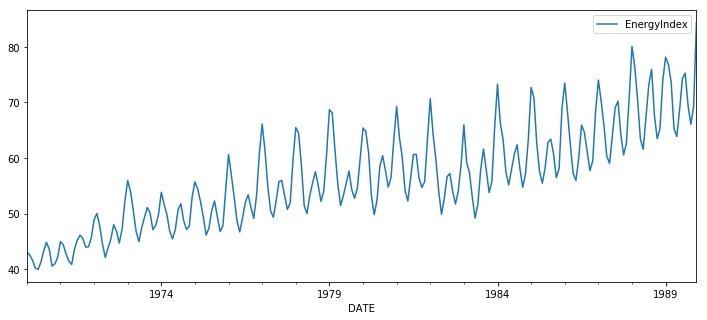

In [4]:
#sizing the plot
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
data_fred.plot()

In [5]:
#Adding freq = 'MS' -> month starting frequency
data_fred = data_fred.asfreq('MS')

In [6]:
data_fred.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [8]:
span = 12
alpha = 1/(span+1)

In [9]:
#Simple Moving average 12 months (SMA-12)
data_fred['EMA-12'] = SimpleExpSmoothing(data_fred['EnergyIndex']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

In [10]:
data_fred.head()

,EnergyIndex,EMA-12
DATE,,
1970-01-01,43.0869,43.086900
1970-02-01,42.5577,43.046192
1970-03-01,41.6215,42.936601
1970-04-01,40.1982,42.725954
1970-05-01,39.9321,42.511043


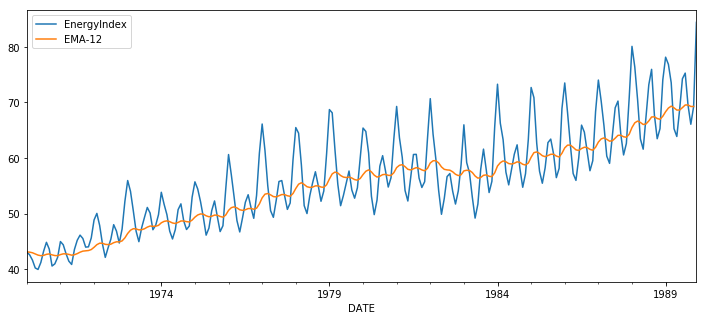

In [11]:
data_fred.plot()

In [13]:
#Triple Exp. moving average (holt-Winters fitted model)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
data_fred['TEMA-12'] = ExponentialSmoothing(data_fred['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [21]:
data_fred.head()

,EnergyIndex,EMA-12,TEMA-12
DATE,,,
1970-01-01,43.0869,43.086900,43.102044
1970-02-01,42.5577,43.046192,41.068353
1970-03-01,41.6215,42.936601,39.725047
1970-04-01,40.1982,42.725954,37.962088
1970-05-01,39.9321,42.511043,38.599450


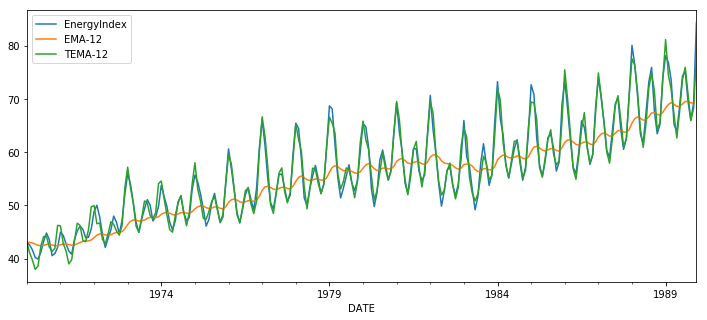

In [23]:
data_fred.plot()

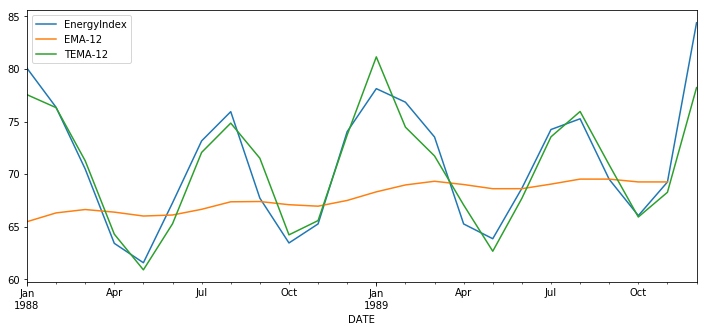

In [25]:
#last 2 years
data_fred.iloc[-24:].plot()

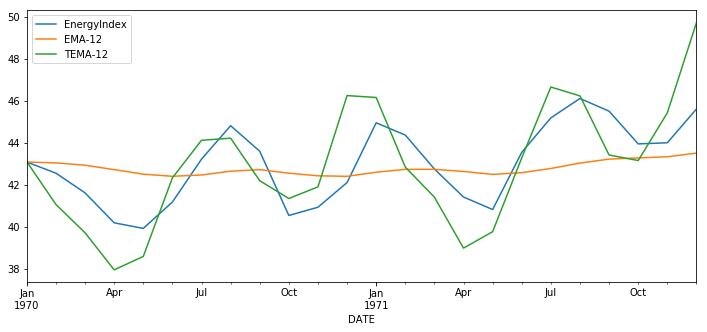

In [26]:
#first 2 years
data_fred.iloc[:24].plot()

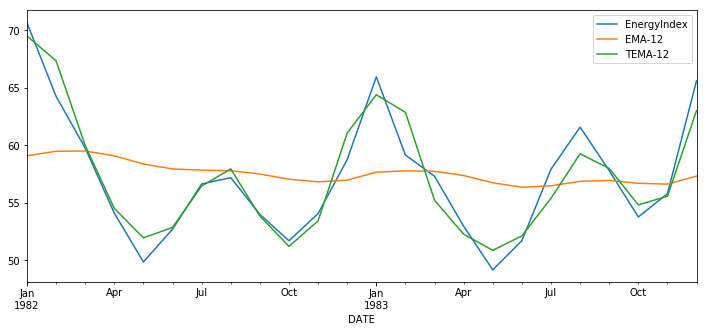

In [35]:
#last 2 years
#data_fred.index
#Recession period
data_fred.loc['1982-01-01':'1983-12-31'].plot()